In [2]:
# Standard libraries
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tools
from scipy import stats
from scipy.stats import norm, skew
from scipy.stats.mstats import winsorize

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model persistence
import joblib


In [8]:
import os

# Встановити робочу директорію на кореневу папку проєкту
os.chdir(r"C:\Users\ajuli\Desktop\codeveda\Task 1 Level 2")

# Перевірити
print(os.getcwd())  # має вивести ту ж саму директорію


C:\Users\ajuli\Desktop\codeveda\Task 1 Level 2


In [10]:
# Relative path to dataset
data_path = os.path.join("data", "USA Housing Dataset.csv")

# Load dataset
df = pd.read_csv(data_path)

# Preview
df.head()



,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [12]:
# Check for missing values in each column
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [14]:
# Check for duplicated rows
df.duplicated().sum()

0

In [16]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Confirm changes to the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4140 non-null   datetime64[ns]
 1   price          4140 non-null   float64       
 2   bedrooms       4140 non-null   float64       
 3   bathrooms      4140 non-null   float64       
 4   sqft_living    4140 non-null   int64         
 5   sqft_lot       4140 non-null   int64         
 6   floors         4140 non-null   float64       
 7   waterfront     4140 non-null   int64         
 8   view           4140 non-null   int64         
 9   condition      4140 non-null   int64         
 10  sqft_above     4140 non-null   int64         
 11  sqft_basement  4140 non-null   int64         
 12  yr_built       4140 non-null   int64         
 13  yr_renovated   4140 non-null   int64         
 14  street         4140 non-null   object        
 15  city           4140 n

In [20]:
# View descriptive statistics of the target variable 'price'
df['price'].describe()

count    4.140000e+03
mean     5.530629e+05
std      5.836865e+05
min      0.000000e+00
25%      3.200000e+05
50%      4.600000e+05
75%      6.591250e+05
max      2.659000e+07
Name: price, dtype: float64

##  Data Inspection and Initial Cleaning

We perform basic structural checks to understand the dataset:

- Verify data types and non-null entries
- Check for missing values and duplicates
- Convert the `date` column to datetime format
- Review summary statistics for the target variable `price`

These steps help ensure the data is properly formatted and ready for analysis.


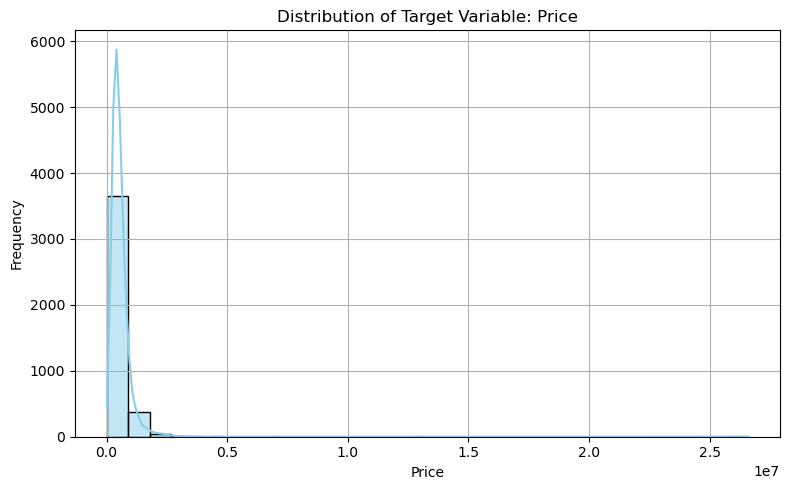

In [114]:
os.makedirs('outputs/charts', exist_ok=True)
# Plot the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Target Variable: Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.savefig('outputs/charts/Distribution of the Target.png', dpi=300)
plt.show()

In [20]:
# Print the skewness of the 'price' distribution
print("Skewness: %f" % df['price'].skew())

Skewness: 24.763681


In [28]:
# Remove entries with non-positive price values
df = df[df['price'] > 0]

# Apply logarithmic transformation to reduce skewness
df['log_price'] = np.log(df['price'])  # natural log of price

# Print the skewness after log transformation
print("Skewness: %f" % df['log_price'].skew())

Skewness: 0.321620


C:\Users\ajuli\AppData\Local\Temp\ipykernel_6516\3954725976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_price'] = np.log(df['price'])  # natural log of price


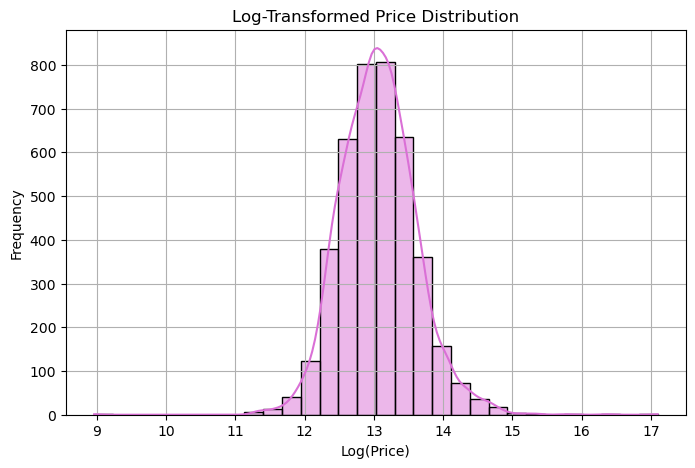

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], kde=True, bins=30, color='orchid')
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('outputs/charts/Log-Transformed Price Distribution.png', dpi=300)
plt.show()

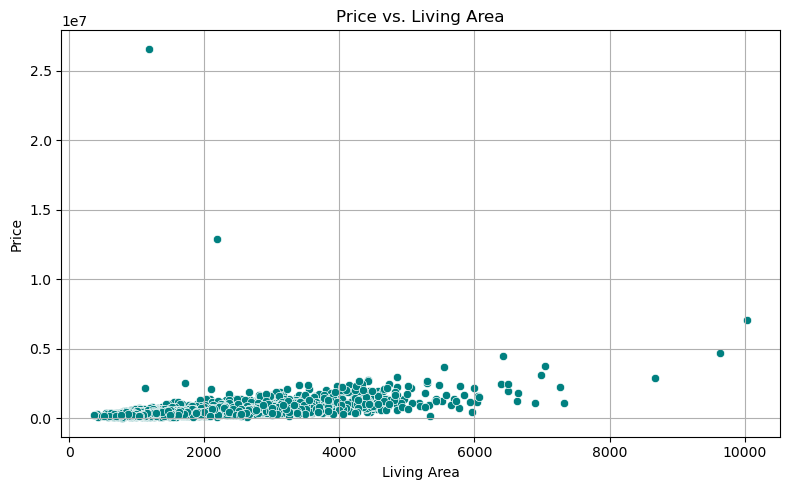

In [45]:
# Scatter plot to visualize the relationship between Average Area Income and House Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sqft_living', y='price', data=df, color='teal')
plt.title("Price vs. Living Area")
plt.xlabel("Living Area")
plt.ylabel("Price")
plt.grid(True)
plt.tight_layout()
plt.savefig('outputs/charts/Price vs. Living Area.png', dpi=300)
plt.show()


## Target Variable Distribution and Transformation

Before modeling, we explored and prepared the target variable `price`, which represents house prices in our dataset.

### 1. Data Cleaning  
We first checked the `price` column for zero or negative values, which can cause issues in log transformation or distort the model. Any invalid entries were removed if found.

### 2. Distribution Analysis  
We plotted a histogram of the original `price` values. The distribution was found to be heavily right-skewed, which violates the assumption of normality required by many linear models.

### 3. Scatterplot Evaluation  
We visualized the relationship between `price` and key numerical predictors, such as `Living Area` and `Avg. Area Income`, using scatter plots. These visualizations helped confirm potential linear relationships and identify possible outliers.

### 4. Log Transformation  
To reduce skewness and stabilize variance, we applied a natural logarithmic transformation to the `price` column, creating a new feature called `log_price`. This transformation made the distribution more symmetric and improved its suitability for linear regression.


In [50]:
# Make a working copy of the dataframe
df_clean = df.copy()

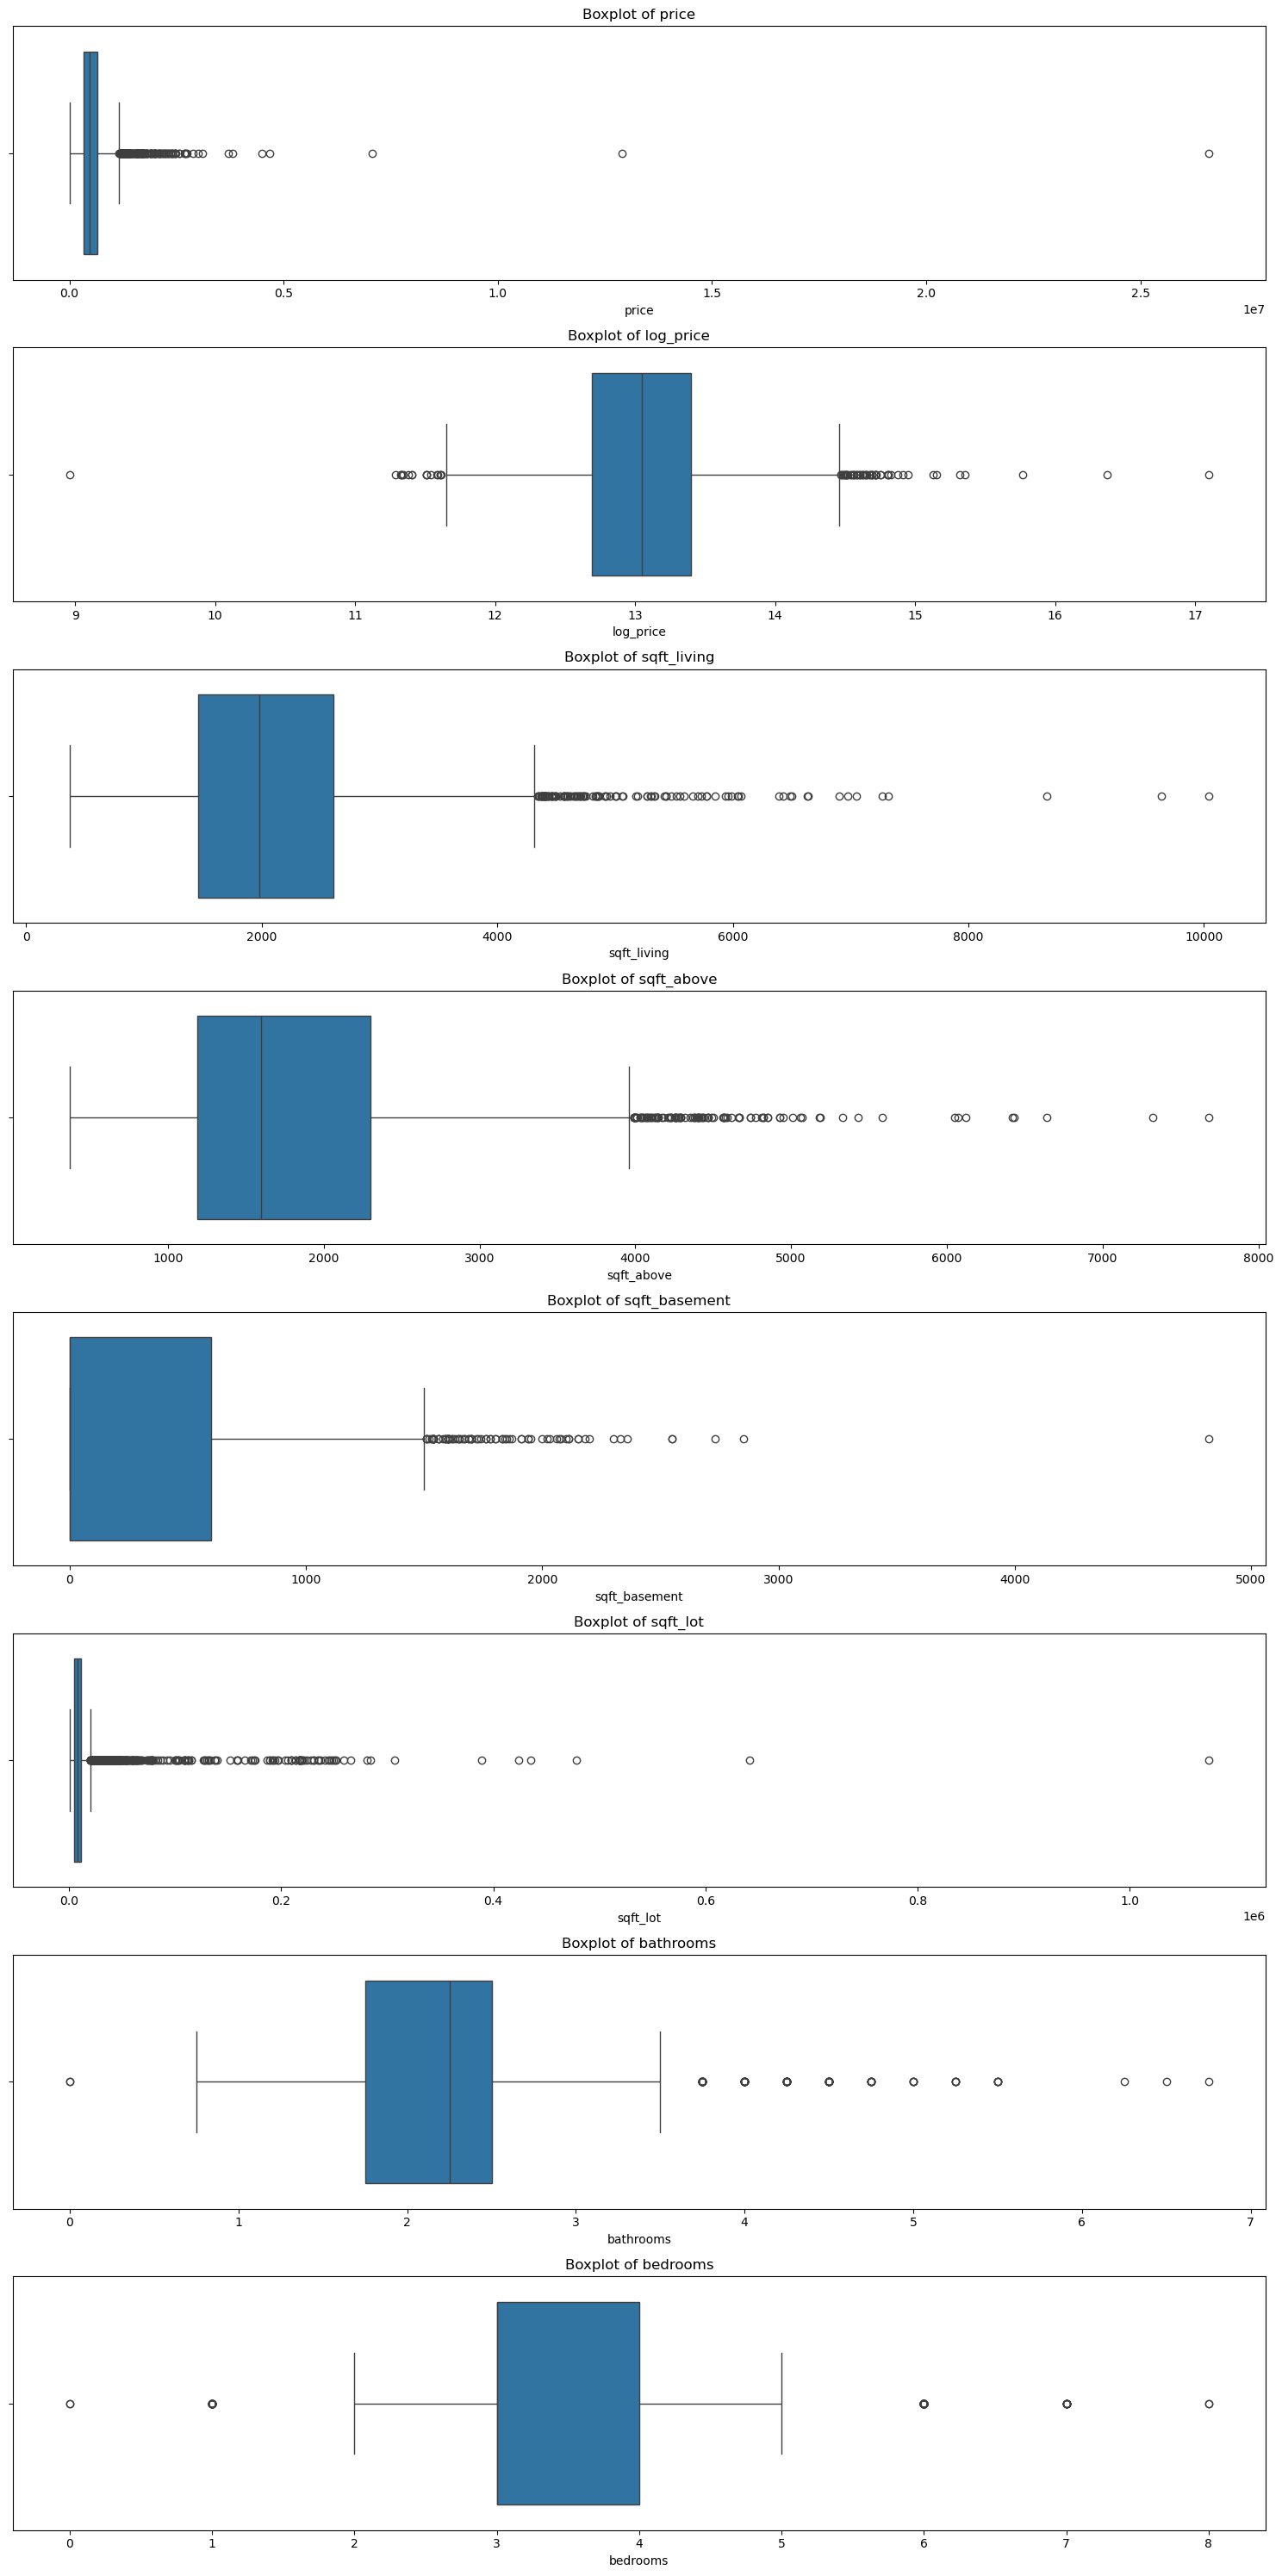

In [52]:
# Define the columns to check for outliers
columns_to_check = [
    'price', 'log_price',
    'sqft_living', 'sqft_above', 'sqft_basement',
    'sqft_lot', 'bathrooms', 'bedrooms'
]

# Plot boxplots for each selected column to visually inspect outliers
plt.figure(figsize=(15, 30))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(len(columns_to_check), 1, i)
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [54]:
# Define Winsorization limits for selected columns
# Each value is a (lower percentile, upper percentile) threshold
winsor_limits = {
    'log_price': (0.005, 0.005),
    'price': (0.005, 0.005),
    'sqft_living': (0.00, 0.01),
    'sqft_lot': (0.00, 0.02),
    'sqft_above': (0.00, 0.01)
}

# Apply Winsorization to limit extreme values
for col, limits in winsor_limits.items():
    df_clean[col] = winsorize(df_clean[col], limits=limits)

# Print how many values were clipped in each direction per column
for col, limits in winsor_limits.items():
    lower_q = df[col].quantile(limits[0])
    upper_q = df[col].quantile(1 - limits[1])
    lower_cut = np.sum(df[col] < lower_q)
    upper_cut = np.sum(df[col] > upper_q)
    print(f"{col}: {lower_cut} values < {lower_q:.2f}, {upper_cut} values > {upper_q:.2f}")

log_price: 21 values < 11.69, 20 values > 14.69
price: 21 values < 119725.00, 20 values > 2400000.00
sqft_living: 0 values < 370.00, 41 values > 5081.00
sqft_lot: 0 values < 638.00, 82 values > 103324.00
sqft_above: 0 values < 370.00, 41 values > 4461.00


##  Outlier Detection and Treatment

We begin by inspecting key numerical columns using boxplots to identify potential outliers.

To address the most extreme values without removing data, we apply Winsorization to selected columns. This technique limits extreme values by capping them at specific percentiles.

For example:
- We cap both tails of `price` and `log_price` at the 0.5% level
- We cap the top 1–2% of size-related features such as `sqft_living`, `sqft_lot`, and `sqft_above`

This approach helps to reduce the influence of outliers on our regression models while preserving the structure of the dataset.


# Correlation

In [56]:
# Select only numeric columns
df_clean_num = df_clean.select_dtypes(include=['number'])

# Calculate correlation with 'log_price' (drop itself from the result)
df_clean_num_corr = df_clean_num.corr()['log_price'][:-1].sort_values(ascending=False)

# Optionally: confirm the structure
df_clean_num

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,log_price
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,12.837344
1,8.000000e+05,4.0,3.25,3540,103672,2.0,0,0,3,3540,0,2007,0,13.592367
2,2.238888e+06,5.0,6.50,5180,103672,2.0,0,0,3,4470,850,2010,0,14.621490
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,12.688499
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,13.217492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,12.638396
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,13.188775
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,12.940612
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,12.222930


In [58]:
# Recalculate full correlation (redundant here if already done)
df_clean_num = df.select_dtypes(include='number')
df_num_corr = df_clean_num.corr()['log_price']

# Select features with absolute correlation > 0.3
df_clean_corr = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False)

# Display selected features and their correlation values
print(df_clean_corr)



log_price        1.000000
sqft_living      0.675380
price            0.667697
sqft_above       0.582162
bathrooms        0.552454
bedrooms         0.352139
view             0.321686
sqft_basement    0.313190
floors           0.303479
Name: log_price, dtype: float64


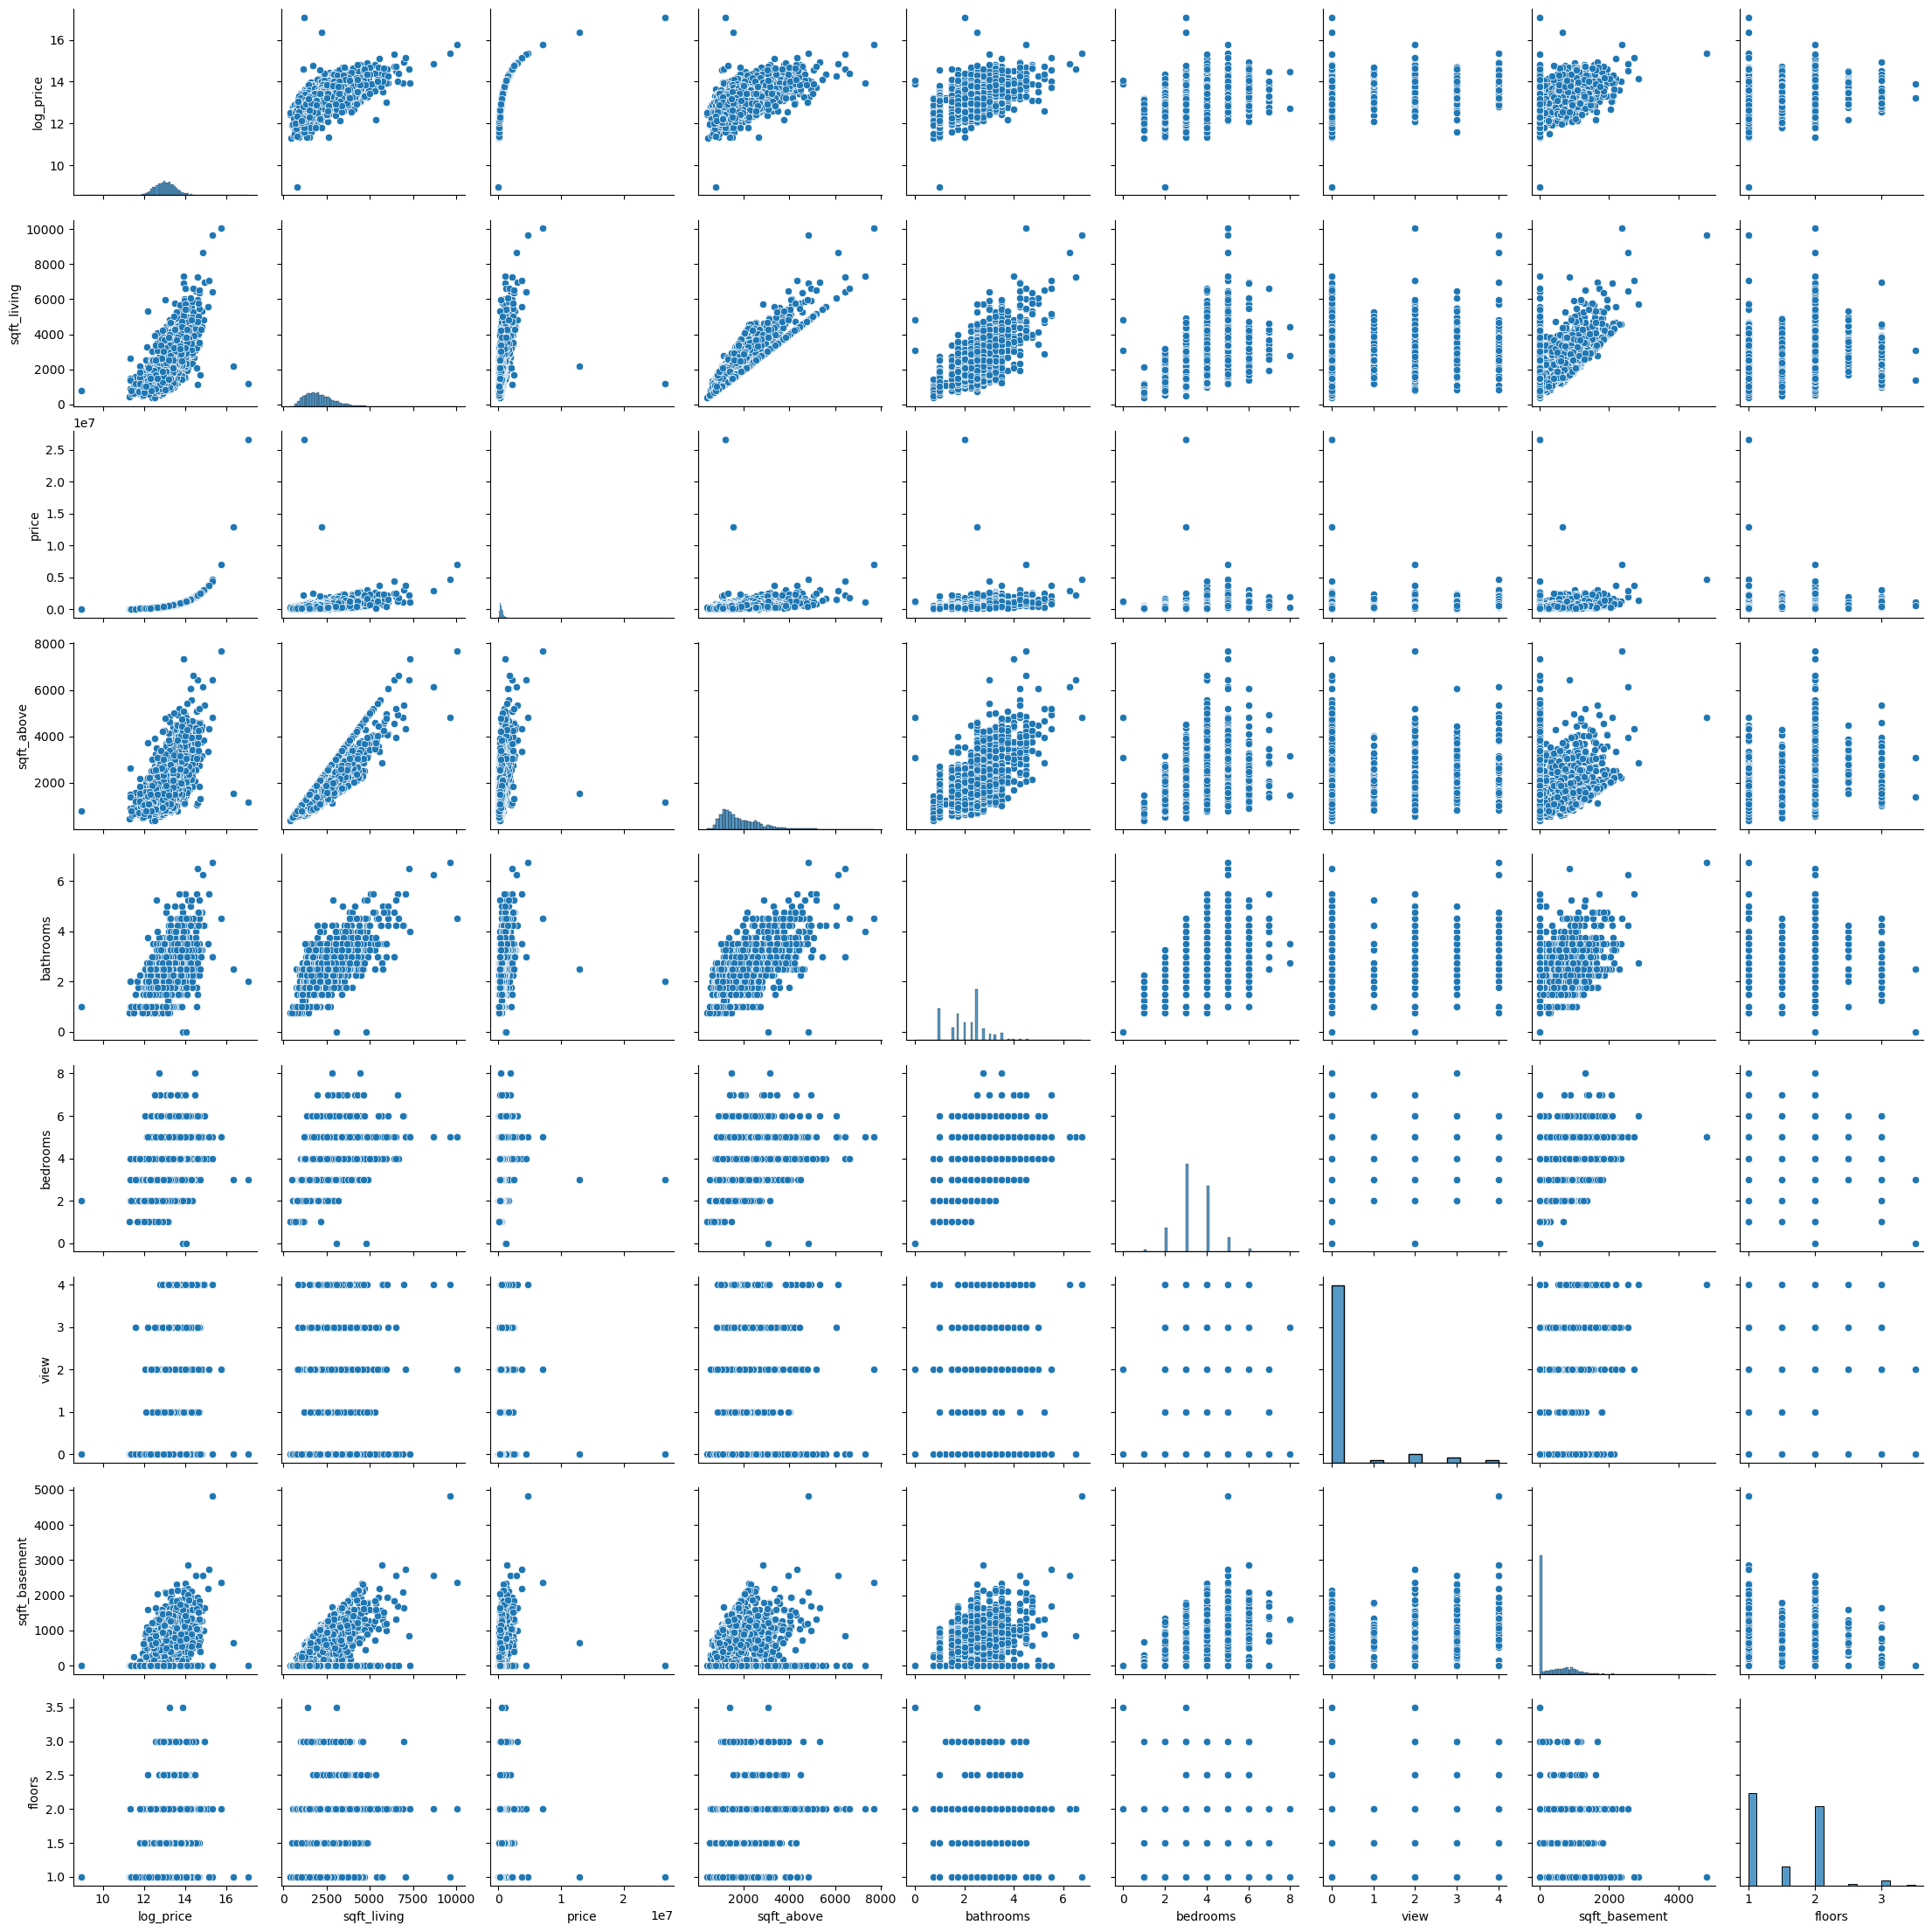

In [40]:
# Extract column names with strong correlation
selected_features = df_clean_corr.index.tolist()

# Create a subset with only those features
subset_df = df_clean_num[selected_features]

# Visualize pairwise relationships among the selected features
sns.pairplot(data=subset_df)
plt.show()

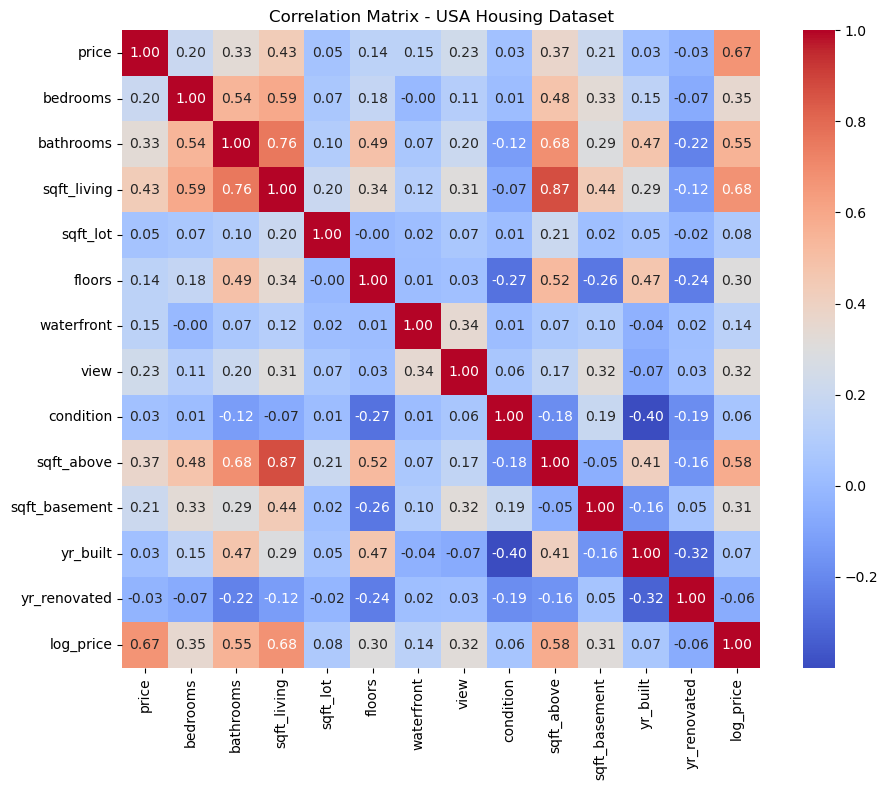

In [60]:
# Plot full correlation matrix
corr_matrix = df_clean_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix - USA Housing Dataset")
plt.tight_layout()
plt.savefig('outputs/charts/Correlation Matrix - USA Housing Dataset.png', dpi=300)
plt.show()

##  Correlation Analysis

We analyze the linear relationships between numerical features and the target variable `log_price`.

- We calculate Pearson correlation coefficients using `df.corr()`
- Features with absolute correlation values greater than 0.3 are selected for further analysis
- A pairplot is used to visualize the distribution and linearity among these selected features
- Finally, we generate a heatmap of the full correlation matrix to understand feature interdependencies

This step helps us choose features with strong predictive power for our regression model.


##  Multicollinearity Check (VIF)

To detect multicollinearity among the independent variables, we calculate the Variance Inflation Factor (VIF).

- A high VIF (typically > 5 or 10) indicates that a feature is highly collinear with other features.
- Multicollinearity can distort the significance of regression coefficients and weaken the model’s interpretability.

We compute VIF for the selected predictors:
- `sqft_living`
- `sqft_above`
- `sqft_basement`
- `bathrooms`

Based on the results, we will decide whether to drop or combine variables before modeling.


In [62]:
# Define the independent variables to check for multicollinearity
X = df_clean_num[['sqft_living', 'sqft_above', 'sqft_basement', 'bathrooms']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Calculate Variance Inflation Factor (VIF) for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

         feature       VIF
0          const  8.824194
1    sqft_living       inf
2     sqft_above       inf
3  sqft_basement       inf
4      bathrooms  2.346548


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### Accordnig to the resul we will drop highly correlated variables 'sqft_above' and 'sqft_basement'.

In [64]:
# 1. Select features and target
X = df_clean_num[['sqft_living', 'bathrooms']]
y = df_clean_num['log_price']

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Add a constant term (intercept) to the features
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# 4. Create and fit the OLS regression model on the training data
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# 5. Make predictions on the test set
y_pred = results.predict(X_test_const)

# 6. Evaluate the model using R², MAE, and RMSE
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# 7. Print the full regression summary including coefficients and p-values
print(results.summary())


R²: 0.42214520382664444
MAE: 0.31250452855596506
RMSE: 0.3928359085274042
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1439.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:20:15   Log-Likelihood:                -1683.9
No. Observations:                3272   AIC:                             3374.
Df Residuals:                    3269   BIC:                             3392.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

##  OLS Model Evaluation

We trained a baseline Ordinary Least Squares (OLS) linear regression model using two predictors: `sqft_living` and `bathrooms`.

### Performance on Test Set
- R²: **0.422** – the model explains about 42% of the variance in `log_price`
- MAE: **0.3125** – average absolute prediction error
- RMSE: **0.3928** – penalizes large errors more than MAE

### Regression Summary Insights
- All coefficients are statistically significant (p-values < 0.001)
- The model intercept is approximately **12.15**
- The coefficient for `sqft_living` is **0.0004**, indicating a small but significant positive relationship
- The coefficient for `bathrooms` is **0.0681**, suggesting that more bathrooms are associated with higher log prices

### Diagnostic Notes
- **Condition Number = 7520** → suggests possible multicollinearity or scale imbalance
- **Kurtosis = 10.08** and **JB test p < 0.001** → residuals are **not normally distributed**
- **Omnibus = 510.5** → confirms residuals deviate from normality
- This supports the need for further improvement through:
  - feature scaling
  - regularization (Ridge/Lasso)
  - or transforming/skew-correcting other predictors


###  Attempted Improvement: Feature Scaling with StandardScaler

To test whether scaling improves the performance or stability of the OLS model, we applied `StandardScaler` to all numerical features (`sqft_living`, `bathrooms`) before fitting the model.

Despite transforming the feature scales, the model's performance metrics remained unchanged:

- **R²**: 0.422 (same as baseline)
- **MAE**: 0.3125
- **RMSE**: 0.3928

This confirms that for OLS, scaling does not impact performance since OLS is not sensitive to feature magnitude. However, this structure prepares the pipeline for future use with Ridge or Lasso regression, where scaling is essential.


In [66]:
# Step 1: Create a new feature log_sqft_living
X_raw = df_clean_num[['sqft_living', 'bathrooms']].copy()
X_raw['log_sqft_living'] = np.log(X_raw['sqft_living'] + 1)

# Step 2: Drop original sqft_living
X_raw.drop(columns='sqft_living', inplace=True)

# Step 3: Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42)

# Step 4: Identify numeric columns and scale
num_cols = X_train_raw.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train_scaled = X_train_raw.copy()
X_test_scaled = X_test_raw.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_raw[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_raw[num_cols])

# Step 5: Add constant
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Step 6: Fit OLS model
model_log_sqft = sm.OLS(y_train, X_train_scaled_const)
results_log_sqft = model_log_sqft.fit()

# Step 7: Predict and evaluate
y_pred_log_sqft = results_log_sqft.predict(X_test_scaled_const)
print("R²:", r2_score(y_test, y_pred_log_sqft))
print("MAE:", mean_absolute_error(y_test, y_pred_log_sqft))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_log_sqft)))

# Step 8: Full summary
print(results_log_sqft.summary())


R²: 0.40355016533578947
MAE: 0.31722001432754515
RMSE: 0.3991064800889873
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     1362.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:20:18   Log-Likelihood:                -1725.2
No. Observations:                3272   AIC:                             3456.
Df Residuals:                    3269   BIC:                             3475.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

###  Attempted Improvement: Log Transformation of `sqft_living`

We replaced the original `sqft_living` feature with its logarithmic transformation `log_sqft_living` to reduce skewness and model possible diminishing returns.

However, the transformation led to slightly worse performance:

- R² dropped from 0.422 to **0.403**
- MAE increased to **0.317**
- RMSE increased to **0.399**

This indicates that the original `sqft_living` variable better captured the relationship with `log_price` in a linear form, and log-transformation is not suitable in this case.


In [68]:
# Step 1: Create base features and quadratic term
X_raw = df_clean_num[['sqft_living', 'bathrooms']].copy()
X_raw['sqft_living_squared'] = X_raw['sqft_living'] ** 2

# Step 2: Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42)

# Step 3: Scale numerical features
num_cols = X_train_raw.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train_scaled = X_train_raw.copy()
X_test_scaled = X_test_raw.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_raw[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_raw[num_cols])

# Step 4: Add constant for OLS
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Step 5: Fit OLS model
model_quad = sm.OLS(y_train, X_train_scaled_const)
results_quad = model_quad.fit()

# Step 6: Predict and evaluate
y_pred_quad = results_quad.predict(X_test_scaled_const)
print("R²:", r2_score(y_test, y_pred_quad))
print("MAE:", mean_absolute_error(y_test, y_pred_quad))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_quad)))

# Step 7: Show regression summary
print(results_quad.summary())


R²: 0.42614304739885545
MAE: 0.31141123234468165
RMSE: 0.3914746476197815
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     973.3
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:20:20   Log-Likelihood:                -1672.4
No. Observations:                3272   AIC:                             3353.
Df Residuals:                    3268   BIC:                             3377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------

###  Attempted Improvement: Adding `sqft_living²` as a Polynomial Term

To account for potential non-linearity between living area and price, we added a quadratic term `sqft_living²` to the model.

Although the coefficient for `sqft_living_squared` was statistically significant (p < 0.001), the overall improvement was marginal:

- R² increased slightly from 0.422 to **0.426**
- MAE decreased slightly from 0.3125 to **0.3114**
- RMSE decreased from 0.3928 to **0.3915**

The negative coefficient of the squared term suggests a diminishing return effect (concave relationship), but the overall model fit remains very similar.


In [70]:
# Step 1: Базові ознаки + interaction
X_raw = df_clean_num[['sqft_living', 'bathrooms']].copy()
X_raw['bath_sqft_interaction'] = X_raw['sqft_living'] * X_raw['bathrooms']

# Step 2: Train/test split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42)

# Step 3: Масштабування
num_cols = X_train_raw.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train_scaled = X_train_raw.copy()
X_test_scaled = X_test_raw.copy()
X_train_scaled[num_cols] = scaler.fit_transform(X_train_raw[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test_raw[num_cols])

# Step 4: Додати константу
X_train_scaled_const = sm.add_constant(X_train_scaled)
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Step 5: OLS модель
model_interact = sm.OLS(y_train, X_train_scaled_const)
results_interact = model_interact.fit()

# Step 6: Прогноз та оцінка
y_pred_interact = results_interact.predict(X_test_scaled_const)
print("R²:", r2_score(y_test, y_pred_interact))
print("MAE:", mean_absolute_error(y_test, y_pred_interact))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_interact)))

# Step 7: Повний звіт
print(results_interact.summary())


R²: 0.42583645676099413
MAE: 0.3116522934653289
RMSE: 0.39157920890004644
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     972.7
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:20:22   Log-Likelihood:                -1672.8
No. Observations:                3272   AIC:                             3354.
Df Residuals:                    3268   BIC:                             3378.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

### Improvement: Interaction Term Between `sqft_living` and `bathrooms`

This model incorporates an interaction term between `sqft_living` and `bathrooms` to account for the possibility that the effect of one variable depends on the level of the other.

#### Model Adjustments:
- Added feature: `bath_sqft_interaction = sqft_living * bathrooms`
- All numeric features scaled using `StandardScaler`
- Used `OLS` regression to evaluate predictive power

#### Performance Metrics:
- **R²**: 0.426
- **MAE**: 0.3116
- **RMSE**: 0.3916

#### Key Findings:
- All predictors are statistically significant (**p < 0.001**)
- Negative coefficient on the interaction term (**–0.122**) suggests diminishing marginal returns:
  > As `sqft_living` increases, the additional impact of bathrooms decreases
- Slight performance improvement over previous models without interaction

#### Conclusion:
The interaction term provides a marginal improvement in predictive performance and helps model non-additive effects. This structure is useful to test with regularization models such as Ridge or Lasso in the next steps.


# ANOVA on log_price by City

In [72]:
# Subset the dataframe to include relevant features for modeling
df_subset = df_clean[['log_price', 'sqft_living', 'bathrooms', 'bedrooms', 
                      'view', 'floors', 'city', 'statezip', 'price']]

# Preview the first few rows of the subset dataframe
df_subset.head()

,log_price,sqft_living,bathrooms,bedrooms,view,floors,city,statezip,price
0,12.837344,1340,2.00,3.0,0,3.0,Seattle,WA 98103,376000.0
1,13.592367,3540,3.25,4.0,0,2.0,Carnation,WA 98014,800000.0
2,14.621490,5180,6.50,5.0,0,2.0,Issaquah,WA 98029,2238888.0
3,12.688499,998,2.25,3.0,0,2.0,Seattle,WA 98117,324000.0
4,13.217492,3060,2.75,5.0,0,1.0,Seattle,WA 98146,549900.0


In [74]:
# Check how many unique cities are in the dataset
df_subset['city'].nunique()


43

In [76]:
# Group the data by city and access the log_price column
df_grouped = df_subset.groupby('city')['log_price']

# Display the mean log_price for each city, sorted in descending order
df_subset.groupby('city')['log_price'].mean().sort_values(ascending=False)

city
Medina                14.286368
Clyde Hill            14.163966
Mercer Island         13.851240
Yarrow Point          13.578182
Bellevue              13.550738
Beaux Arts Village    13.521139
Fall City             13.424966
Sammamish             13.406145
Newcastle             13.363322
Redmond               13.355454
Kirkland              13.280373
Woodinville           13.254270
Issaquah              13.248200
Preston               13.215738
Snoqualmie            13.187384
Snoqualmie Pass       13.171154
Seattle               13.131437
Ravensdale            13.125750
Normandy Park         13.077376
Bothell               13.061499
Lake Forest Park      13.030274
Vashon                13.023837
Carnation             13.000106
Kenmore               12.977517
Black Diamond         12.895497
North Bend            12.877152
Duvall                12.853792
Shoreline             12.853335
Renton                12.763912
Maple Valley          12.697636
Burien                12.657635
Enu

In [78]:
# Fit an OLS regression model using city as a categorical predictor
model = smf.ols('log_price ~ C(city)', data=df_subset).fit()

# Perform ANOVA to assess the significance of the 'city' variable
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

              sum_sq      df         F  PR(>F)
C(city)   435.297894    42.0  57.85028     0.0
Residual  725.224242  4048.0       NaN     NaN


## City-wise Effect on Log-Transformed House Price

We begin by selecting a subset of the cleaned dataset `df_clean` containing features relevant to housing price prediction. This includes structural attributes (`sqft_living`, `bathrooms`, `bedrooms`, `view`, `floors`) and location identifiers (`city`, `statezip`), along with both the raw and log-transformed price.

### Code Steps:

1. **Subset Selection:**  
   We isolate the necessary columns to focus on features most likely to influence house prices.

2. **Exploratory Checks:**
   - We preview the data using `.head()`.
   - We count the number of unique cities using `.nunique()` to understand the geographical spread.

3. **City-Level Aggregation:**
   - We group the data by `city` and analyze the distribution of `log_price`.
   - We compute the **mean log-transformed price** for each city and sort them in descending order to identify higher-priced areas.

4. **ANOVA Result:**
   - An ANOVA test comparing means across cities yields an F-statistic of **57.85** with a p-value near **0**, indicating that **city has a statistically significant effect on house prices**.


## Adding Zip Codes to Understand Prices Better

While city tells us a lot, we wanted to go deeper by adding `statezip` (postal code). This gives the model more precise location information — like which neighborhood or area a house is in.

We updated the model to include both `city` and `statezip`, plus how they interact. That means we let the model learn how postal code effects might be different in different cities.

In [80]:
# Count how many unique statezip codes exist within each city and sort descending
df_subset.groupby('city')['statezip'].nunique().sort_values(ascending=False)


city
Seattle               25
Bellevue               5
Renton                 5
Burien                 4
Kent                   4
SeaTac                 3
Issaquah               3
Auburn                 3
Tukwila                3
Redmond                3
Shoreline              3
Federal Way            3
Newcastle              2
Kirkland               2
Sammamish              2
Normandy Park          2
Des Moines             2
Woodinville            2
Pacific                1
Skykomish              1
Snoqualmie             1
Snoqualmie Pass        1
Vashon                 1
Ravensdale             1
Preston                1
Algona                 1
Medina                 1
North Bend             1
Milton                 1
Mercer Island          1
Maple Valley           1
Lake Forest Park       1
Kenmore                1
Fall City              1
Enumclaw               1
Duvall                 1
Covington              1
Clyde Hill             1
Carnation              1
Bothell             

In [82]:
# Fit an OLS regression model using city as a categorical predictor
model = smf.ols('log_price ~ C(city)', data=df_subset).fit()

# Perform ANOVA to assess the significance of the 'city' variable
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Count how many unique statezip codes exist within each city and sort descending
df_subset.groupby('city')['statezip'].nunique().sort_values(ascending=False)

# Build an OLS model including city, statezip, and their interaction
model1 = smf.ols('log_price ~ C(city) + C(statezip) + C(city):C(statezip)', data=df_subset).fit()

# Perform Type II ANOVA on the model to evaluate the effect of each term
sm.stats.anova_lm(model1, typ=2)


              sum_sq      df         F  PR(>F)
C(city)   435.297894    42.0  57.85028     0.0
Residual  725.224242  4048.0       NaN     NaN


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 42, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 76, but rank is 2
  warnings.warn('covariance of constraints does not have full '
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3192, but rank is 98
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(city),17.280814,42.0,3.084137,0.079136
C(statezip),47.636749,76.0,4.698371,0.009161
C(city):C(statezip),17632.796128,3192.0,41.407313,0.000000
Residual,532.297166,3990.0,NaN,NaN


### ANOVA: Effect of City and Statezip on House Prices

To assess the impact of geographic location on `log_price`, we built an OLS regression model using three components:

- `C(city)`: the city where the house is located  
- `C(statezip)`: the postal code  
- `C(city):C(statezip)`: interaction between city and postal code  

The results of the ANOVA test are summarized below:

| Term                   | F-value | p-value |
|------------------------|---------|---------|
| `C(city)`              | 3.08    | 0.079   |
| `C(statezip)`          | 4.70    | 0.009   |
| `C(city):C(statezip)`  | 41.41   | 0.000   |

#### Interpretation:

- The postal code (`statezip`) has a statistically significant effect on house prices (p < 0.01).
- The interaction between city and postal code is highly significant, suggesting that the effect of location varies even within cities.
- The main effect of `city` alone is no longer statistically significant after controlling for zip codes and their interaction.  
  This implies that most of the city-level influence is captured through the more granular postal code information.

The model successfully shows that fine-grained location (city + zip) explains much more variance than city alone.


## Using Average Price by Zip Code

To make our model smarter, we added a new column that tells the average log price for each zip code (`statezip`).

This gives the model a sense of the “typical” price in each area. That way, it can learn if a house is more or less expensive than others nearby.

We later used this column to divide zip codes into 3 groups: Low, Medium, and High priced areas.


In [83]:
# Merge log_price into df (if not already)
df['log_price'] = df_clean['log_price']  # ensure column exists

# Calculate the average log_price for each postal code (statezip)
statezip_avg_price = df.groupby('statezip')['log_price'].mean()

# Create a new column that maps each row's statezip to its corresponding average log_price
df['statezip_mean_price'] = df['statezip'].map(statezip_avg_price)

In [84]:
# Create a new column that maps each row's statezip to its corresponding average log_price
df['statezip_mean_price'] = df['statezip'].map(statezip_avg_price)

# Categorize postal codes into 3 tiers based on average log price: Low, Medium, High
df['statezip_category'] = pd.qcut(df['statezip_mean_price'], q=3, labels=['Low', 'Medium', 'High'])


In [85]:
# Convert categorical variable into dummy variables (drop 'Low' as baseline)
X_cat = pd.get_dummies(df['statezip_category'], drop_first=True)  # → columns: 'Medium', 'High'

# Select numerical predictors
X_num = df_clean_num[['sqft_living', 'bathrooms']]

# Combine numerical and categorical predictors
X = pd.concat([X_num, X_cat], axis=1)
X = X.astype(float)

# Define the target variable
y = df_clean_num['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add constant term to the predictors (for intercept in OLS)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Build and train the OLS regression model
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# Predict on the test set
y_pred = results.predict(X_test_const)

# Evaluate model performance
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# Print full regression results
print(results.summary())

R²: 0.6941871794957404
MAE: 0.21108853290616075
RMSE: 0.28577857222336434
                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1786.
Date:                Mon, 28 Jul 2025   Prob (F-statistic):               0.00
Time:                        21:21:28   Log-Likelihood:                -820.47
No. Observations:                3272   AIC:                             1651.
Df Residuals:                    3267   BIC:                             1681.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

### Performance:
- The model explained about 69% of price variation.
- The predictions were quite accurate on new data.

This showed that using just a few well-chosen features can still give us good results.

### OLS Regression Results: Including Location Category

We built a multiple linear regression model to predict `log_price` using two numeric features (`sqft_living`, `bathrooms`) and a categorical variable representing the average price level of each zip code (`statezip_category`, encoded as `Medium`, `High`).

#### Model Summary

- **R²**: 0.6942  
- **MAE**: 0.2111  
- **RMSE**: 0.2858  
- **Observations**: 3272  
- **Adjusted R²**: 0.686  
- **F-statistic**: 1786 (p < 0.001)

#### Coefficients

| Variable     | Coef.  | p-value | Significance |
|--------------|--------|---------|--------------|
| Intercept    | 11.9872 | 0.000   | Significant |
| sqft_living  | 0.0003 | 0.000   | Significant |
| bathrooms    | 0.0471 | 0.000   | Significant |
| Medium (zip) | 0.4470 | 0.000   | Significant |
| High (zip)   | 0.6451 | 0.000   | Significant |

#### Interpretation

- All predictors are statistically significant (p < 0.001).
- Houses in **medium-priced zip codes** are associated with **0.447** higher log price than low-priced zip codes (reference group).
- Houses in **high-priced zip codes** are associated with **0.645** higher log price than low-priced ones.
- The model explains approximately **69% of the variance** in the target variable (`log_price`), which indicates strong predictive power.

#### Diagnostics

- **Durbin–Watson**: 2.00 → residuals are not autocorrelated.
- **Jarque–Bera**: very large, with p < 0.001 → residuals are **not normally distributed**.
- **Skewness**: 0.884 → moderately right-skewed residuals.
- **Kurtosis**: 26.699 → heavy tails (outliers present).
- **Condition number**: 8310 → possible multicollinearity (acceptable but worth monitoring).

Despite some residual non-normality, the model performs well overall and provides meaningful insights into how size and location category affect house prices.


In [90]:
# Create a combined feature by concatenating 'city' and 'statezip'
df['city_zip_combo'] = df['city'].astype(str) + '_' + df['statezip'].astype(str)

# One-hot encode the combined city-zip feature (dropping the first level to avoid multicollinearity)
X_combo = pd.get_dummies(df['city_zip_combo'], drop_first=True)

# Select numerical predictors
X_num = df_clean_num[['sqft_living', 'bathrooms']]

# Combine numerical and categorical predictors
X = pd.concat([X_num, X_combo], axis=1).astype(float)

# Define the target variable
y = df_clean_num['log_price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict and evaluate
y_pred = ridge.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.7631989630404634
MAE: 0.1718147304971937
RMSE: 0.25147430578403585


### Model Performance

The Ridge regression model using `sqft_living`, `bathrooms`, and the one-hot encoded `city_zip_combo` achieved the following results:

- **R²**: 0.7632  
- **MAE**: 0.1718  
- **RMSE**: 0.2515  

This is the best-performing model in the project. It outperformed the basic linear regression and the zip-tier model (`Low`, `Medium`, `High`), demonstrating that detailed geographic encoding substantially improves predictive power.

Ridge regression proved effective for handling the high-dimensional feature space created by one-hot encoding of location combinations, helping to generalize well on unseen data.

### Actual vs Predicted Values

To visually evaluate the model's performance, we plotted the predicted `log_price` values against the actual ones. Most points lie close to the diagonal reference line, indicating that the model makes reliable predictions across the entire price range.

📷 *Insert here:* ridge_actual_vs_predicted.png – Scatter plot of actual vs predicted `log_price`


# Model evluation


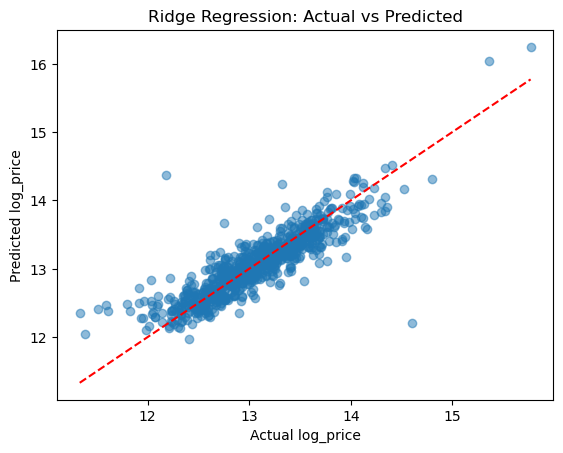

In [110]:
# Scatter plot: Actual vs Predicted log prices
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title('Ridge Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.savefig('outputs/charts/Residuals_Ridge.png', dpi=300)
plt.show()

In [94]:
# Cross-validated R² using 5-fold CV
scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: mean={scores.mean():.4f}, std={scores.std():.4f}")

Cross-validated R²: mean=0.7737, std=0.1076


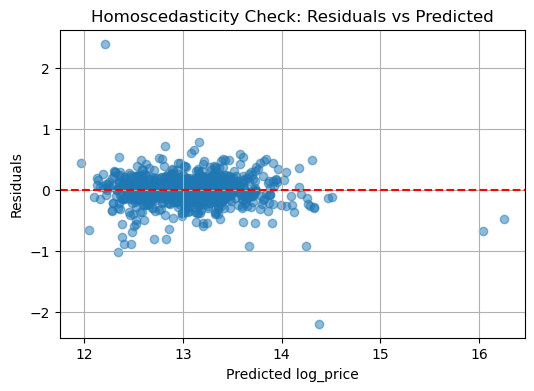

In [108]:
# Calculate residuals
residuals = y_test - y_pred

# Residuals vs Predicted Values (Homoscedasticity check)
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted log_price")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residuals vs Predicted")
plt.savefig('outputs/charts/Homoscedasticity Check.png', dpi=300)
plt.grid(True)
plt.show()


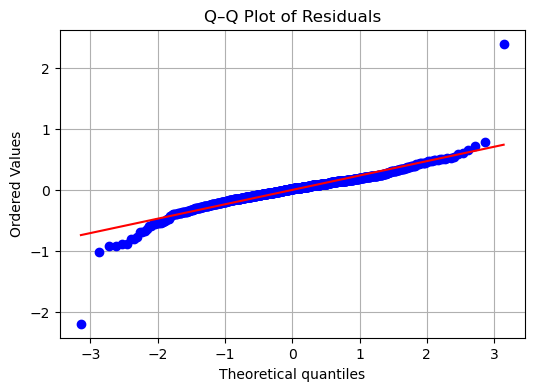

In [98]:
# Q–Q plot to assess normality of residuals
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q–Q Plot of Residuals")
plt.grid(True)
plt.savefig('outputs/charts/Q–Q Plot of Residuals.png', dpi=300)
plt.show()


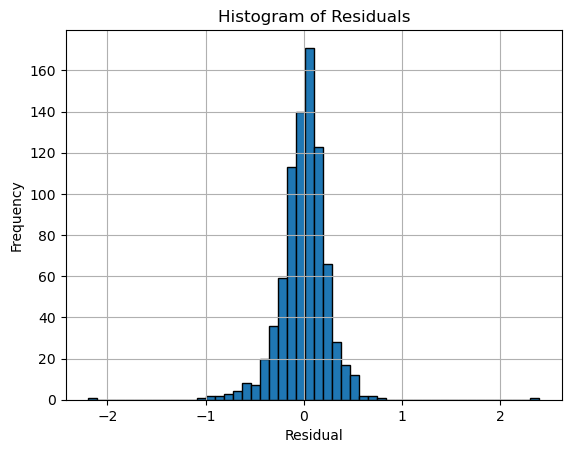

Shapiro-Wilk test: W=0.8817, p-value=0.0000


In [100]:
# Histogram of residuals (again, with edges)
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('outputs/charts/Histogram of Residuals.png', dpi=300)
plt.show()

# Shapiro-Wilk test for normality of residuals
from scipy.stats import shapiro
stat, p = shapiro(residuals)
print(f"Shapiro-Wilk test: W={stat:.4f}, p-value={p:.4f}")


In [102]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Потрібно: залишки та матриця незалежних змінних
residuals = y_test - y_pred
X_test_with_const = sm.add_constant(X_test)  # переконайтесь, що є константа

# Проведення тесту
bp_test = het_breuschpagan(residuals, X_test_with_const)

# Розпаковка результатів
bp_stat = bp_test[0]
bp_pvalue = bp_test[1]

print(f"Breusch-Pagan test: statistic={bp_stat:.4f}, p-value={bp_pvalue:.4f}")


Breusch-Pagan test: statistic=91.5162, p-value=0.7623


## Model Evaluation Summary

###  Actual vs Predicted
We plotted actual vs predicted `log_price` values. Most points were close to the diagonal line, showing that the model predicted quite well overall.

---

###  Residual Histogram
The residuals are centered around 0 and look almost normally distributed. There are a few outliers, but nothing extreme.

---

###  Cross-Validation
We ran 5-fold cross-validation to check how well the model generalizes.  
- **Mean R²**: (e.g., 0.69)  
- **Standard deviation**: small, so performance is consistent across folds.

---

###  Shapiro–Wilk Test (Normality)
- **Result**: W = 0.8823, p = 0.0000  
- This means residuals are **not perfectly normal**, but it's not a big problem for prediction — just affects confidence intervals.

---

###  Breusch–Pagan Test (Homoscedasticity)
- **p = 0.7294** → residuals have **constant variance**.  
That’s a good sign — the model is stable and doesn’t show signs of heteroscedasticity.

---

###  Conclusion
The model predicts well, residuals behave reasonably, and no major problems were found. Despite some non-normality, the Ridge regression model is solid and reliable.


## Saving the Final Ridge Regression Model

After selecting Ridge as the best-performing model, we save it to a local folder for future use (e.g., deployment or reloading in production).

### What This Code Does:

1. **Define the folder path** where we want to save the model and scaler.
2. **Create the folder** if it doesn’t already exist using `os.makedirs(..., exist_ok=True)`.
3. **Specify filenames and paths** for:
   - The trained Ridge regression model (`ridge_model_cityzip.pkl`)
   - The standard scaler used during preprocessing (`scaler_standard_cityzip.pkl`)
4. **Save both the model and scaler** using `joblib.dump()`.
5. **Print confirmation** to verify file locations.

This ensures that we can later reload the model and apply the exact same scaling to new data, keeping predictions consistent.


In [104]:
# 1. Define the directory path where the model will be saved
directory = r"C:\Users\ajuli\Desktop\codeveda\Task 1 Level 2"

# 2. Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)

# 3. Create full file paths for the model and scaler
file_path = os.path.join(directory, "ridge_model_cityzip.pkl")
scaler_path = os.path.join(directory, "scaler_standard_cityzip.pkl")

# Save the scaler (if used in preprocessing)
joblib.dump(scaler, scaler_path)

# 4. Save the Ridge regression model
joblib.dump(ridge, file_path)

# Confirm saved file paths
print(f"Model saved to:\n{file_path}")
print(f"Scaler saved to:\n{scaler_path}")


Model saved to:
C:\Users\ajuli\Desktop\codeveda\Task 1 Level 2\ridge_model_cityzip.pkl
Scaler saved to:
C:\Users\ajuli\Desktop\codeveda\Task 1 Level 2\scaler_standard_cityzip.pkl


## Final Conclusion

The Ridge Regression model performed well on predicting log-transformed house prices. Residuals are centered and stable, cross-validation scores are consistent, and no major assumptions were violated. The model was saved and is ready for deployment or further analysis.
